In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CombinedData.csv")
df.head()

Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety

In [3]:
df = df[["statement", "status"]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [5]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [8]:
import plotly.express as px

In [9]:
fig = px.pie(values=df.groupby("status").count()["statement"].values, names=df.groupby("status").count().index, title="Status rates")
fig.show()

In [10]:
import random

In [11]:
random.sample(list(df["statement"].values), 5)

['If it works the way its supposed to, ill be too sedated by the medication to tear the bag off my head, especially if i belt two around my neck when it starts to kick in. Ill put a blanket over my head too, in order to reduce the noise. I have tried so hard for so long but every single day feels so wrong. I have seen therapists. I have been to treatment facilities. I have been in the er countless times. I just do not understand why people try so hard for something so unforgiving. It is not worth pushing through constant pain and suffering. What pleasure is there to have? I have nothing. I have failed my entire life. I pushed away everyone. Dropped out, cannot even hold a job or get a license because of all these thoughts. I idolize people who succeeded at killing themselves. I envy them. Knowing that the next step is unknown but taking the leap of faith to escape this hell. I am scared of the unknown, but this pain is unbearable. I have heard it all and tried to believe it will hurt o

In [12]:
! pip install nltk

In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\atliu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
def sentence_count(x):
    return nltk.sent_tokenize(x)

In [15]:
df["char_count"] = df["statement"].str.len()
df["sentences"] = df["statement"].apply(sentence_count)
df["sentence_count"] = df["sentences"].str.len()
df.head()

statement   status  char_count  \
0                                         oh my gosh  Anxiety          10   
1  trouble sleeping, confused mind, restless hear...  Anxiety          64   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety          78   
3  I've shifted my focus to something else but I'...  Anxiety          61   
4  I'm restless and restless, it's been a month n...  Anxiety          72   

                                           sentences  sentence_count  
0                                       [oh my gosh]               1  
1  [trouble sleeping, confused mind, restless hea...               2  
2  [All wrong, back off dear, forward doubt., Sta...               2  
3  [I've shifted my focus to something else but I...               1  
4  [I'm restless and restless, it's been a month ...               2

In [16]:
df[["char_count", "sentence_count"]].describe()

char_count  sentence_count
count  52681.000000    52681.000000
mean     579.491638        6.280215
std      847.399668       10.688388
min        2.000000        1.000000
25%       80.000000        1.000000
50%      317.000000        3.000000
75%      753.000000        8.000000
max    32759.000000     1260.000000

In [17]:
fig = px.histogram(df, x="char_count")
fig.update_layout(
    xaxis = dict(
        rangeslider = dict(
            visible = True,
            autorange = True
        )
    )
)
fig.show()

In [18]:
fig = px.box(df, y= "char_count", x = "status")
fig.show()

In [19]:
df.groupby("status").describe()

char_count                                               \
                          count        mean          std   min    25%    50%   
status                                                                         
Anxiety                  3841.0  768.195001   816.798889   7.0  226.0  544.0   
Bipolar                  2777.0  950.785380   957.154372  27.0  401.0  700.0   
Depression              15404.0  844.315048   953.275650   3.0  272.0  562.0   
Normal                  16343.0   90.244447   120.898909   2.0   28.0   50.0   
Personality disorder     1077.0  961.315692  1152.967948  39.0  359.0  738.0   
Stress                   2587.0  615.511403   574.027066   6.0  337.5  459.0   
Suicidal                10652.0  734.967330   982.210476   6.0  203.0  453.0   

                                       sentence_count                        \
                          75%      max          count       mean        std   
status                                                                        
Anxiety               1013.00   8551.0         3841.0   8.494402   8.826542   
Bipolar               1180.00  26269.0         2777.0  11.057616  12.188404   
Depression            1079.00  19822.0        15404.0   7.832511  10.459364   
Normal                  96.00   1358.0        16343.0   1.523894   1.162651   
Personality disorder  1263.00  27590.0         1077.0  10.676880  14.838146   
Stress                 675.50   8419.0         2587.0   6.475841   6.305365   
Suicidal               923.25  32759.0        10652.0   8.796940  15.869568   

                                                   
                      min  25%  50%   75%     max  
status                                             
Anxiety               1.0  3.0  6.0  11.0    88.0  
Bipolar               1.0  5.0  8.0  14.0   430.0  
Depression            1.0  1.0  5.0  10.0   300.0  
Normal                1.0  1.0  1.0   1.0    25.0  
Personality disorder  1.0  4.0  8.0  13.0   374.0  
Stress                1.0  5.0  5.0   5.0   131.0  
Suicidal              1.0  2.0  6.0  11.0  1260.0

# cleaning

In [20]:
w = [.5, 1.5]
quantiles = [0.25, 0.75]

In [21]:
df.groupby('status').count()

statement  char_count  sentences  sentence_count
status                                                                
Anxiety                    3841        3841       3841            3841
Bipolar                    2777        2777       2777            2777
Depression                15404       15404      15404           15404
Normal                    16343       16343      16343           16343
Personality disorder       1077        1077       1077            1077
Stress                     2587        2587       2587            2587
Suicidal                  10652       10652      10652           10652

In [22]:
limits = []
groupd_df = df.groupby("status")["char_count"]
for i in range(len(quantiles)):
    limits.append(groupd_df.quantile(quantiles[i]) * w[i])

In [23]:
filtered_df = pd.DataFrame()
for status in limits[0].index:
    filtered_df = pd.concat([filtered_df,
                            df[(df["status"] == status) & (df["char_count"] >= limits[0][status]) & (df["char_count"] <= limits[1][status])]],
                            axis=0,
                            join="outer",
                            ignore_index="True")
filtered_df

statement    status  \
0      sometimes what is needed when there is a probl...   Anxiety   
1      "No regrets or grudges/angry at things that ha...   Anxiety   
2      I've been the most anxious person before I bec...   Anxiety   
3      Why is this cave... I'm already in a bad mood ...   Anxiety   
4      I'm broken and fragile, I'm hurt, I can't stan...   Anxiety   
...                                                  ...       ...   
41571  I hate going into my rap zone cause then I thi...  Suicidal   
41572  RT @KindFashionNY: Please See Me. I Need My Hu...  Suicidal   
41573  Me knowing damn well that I will hate myself f...  Suicidal   
41574  some days i feel deeply depressed i am a highl...  Suicidal   
41575  standing in supermarket line and thinking how ...  Suicidal   

       char_count                                          sentences  \
0             217  [sometimes what is needed when there is a prob...   
1             123  ["No regrets or grudges/angry at things that h...   
2             133  [I've been the most anxious person before I be...   
3             146  [Why is this cave..., I'm already in a bad moo...   
4             199  [I'm broken and fragile, I'm hurt, I can't sta...   
...           ...                                                ...   
41571         142  [I hate going into my rap zone cause then I th...   
41572         135  [RT @KindFashionNY: Please See Me., I Need My ...   
41573         107  [Me knowing damn well that I will hate myself ...   
41574         528  [some days i feel deeply depressed i am a high...   
41575         982  [standing in supermarket line and thinking how...   

       sentence_count  
0                   1  
1                   1  
2                   1  
3                   5  
4                   3  
...               ...  
41571               1  
41572               4  
41573               1  
41574               1  
41575               1  

[41576 rows x 5 columns]

In [24]:
fig = px.box(filtered_df, y= "char_count", x = "status")
fig.show()

In [25]:
filtered_df.groupby("status").describe()

char_count                                               \
                          count        mean         std    min    25%    50%   
status                                                                         
Anxiety                  2767.0  631.070112  363.441653  113.0  326.0  562.0   
Bipolar                  2299.0  740.976512  395.065369  201.0  414.0  654.0   
Depression              11817.0  642.353474  384.594461  136.0  317.0  549.0   
Normal                  13526.0   56.159766   33.591291   14.0   29.0   47.0   
Personality disorder      870.0  800.360920  445.313092  180.0  412.0  733.5   
Stress                   2160.0  473.753241  184.956049  169.0  339.0  439.0   
Suicidal                 8137.0  517.660932  335.770678  102.0  237.0  433.0   

                                      sentence_count                           \
                          75%     max          count      mean       std  min   
status                                                                          
Anxiety                884.50  1519.0         2767.0  7.208529  4.541712  1.0   
Bipolar               1004.00  1769.0         2299.0  8.948673  5.208446  1.0   
Depression             903.00  1617.0        11817.0  6.305492  5.454117  1.0   
Normal                  78.00   144.0        13526.0  1.197028  0.529634  1.0   
Personality disorder  1128.75  1880.0          870.0  8.885057  5.796760  1.0   
Stress                 586.00  1011.0         2160.0  5.171759  2.023859  1.0   
Suicidal               732.00  1383.0         8137.0  6.723117  5.094790  1.0   

                                            
                      25%  50%   75%   max  
status                                      
Anxiety               4.0  6.0  10.0  30.0  
Bipolar               5.0  8.0  12.0  37.0  
Depression            1.0  5.0   9.0  71.0  
Normal                1.0  1.0   1.0   8.0  
Personality disorder  5.0  8.0  12.0  45.0  
Stress                5.0  5.0   5.0  22.0  
Suicidal              3.0  5.0   9.0  42.0

# Text proccess

In [26]:
import re, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atliu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
def lower_it(text):
    """Lowers characters in given string.
    Lowers all in string."""
    return text.lower()

def remove_nonletter(text):
    pattern = re.compile('[^a-zA-Z]')
    return pattern.sub(" ", text)

#def remove_nonletter(text):
    clean_text = []
    regex = re.compile('[^a-zA-Z]')
    for w in text:
        reg = regex.sub("", w)
        if len(reg) > 0:
            clean_text.append(reg)
        else:
            continue
    return clean_text

def remove_digit(text):
    """Digit cleaner.
    Removes digits in given string."""
    digit_pattern = str.maketrans('', '', string.digits)
    return text.translate(digit_pattern)

def remove_them(x):
    """Word cleaner.
    Removes words has lenght less then 3 in given string."""
    return re.sub(r'\b\w{1,2}\b', '', x).strip()

def remove_punctiations(text):
    """Punction cleaner.
    Removes punctions in given string."""
    pattern = str.maketrans('', '', string.punctuation)
    return text.translate(pattern)

def remove_stopwords(text, language='turkish'):
    """Stopword cleaner.
    Removes stopwords in given string, language is set to Turkish by default."""
    st = stopwords.words(language)
    pattern = re.compile(r'\b(' + r'|'.join(st) + r')\b\s*')
    text = pattern.sub('',text)
    return text

def remove_links(text):
    return re.sub(r'http[s]?://\S+', '', text).strip()

def remove_mentions(text):
    return re.sub(r'@\w+', '', text).strip()

def token_it(text):
    return word_tokenize(text)

def stem_and_connect(text):
    ps = nltk.stem.PorterStemmer()
    connected = ""
    for w in text: connected += ps.stem(str(w)) + " "
    return connected.strip()

def lemm_and_connect(text):
    wnl = WordNetLemmatizer()
    connected = ""
    for w in text: connected += wnl.lemmatize(str(w), "v") + " "
    return connected.strip()

def sentence_it(x):
    """Sentence maker.
    Returns one string form of given words array."""
    sentence = ''
    for w in x: sentence += w + " "
    return sentence.strip()

def prepare_it(text):

    #text = remove_digit(text)
    text = remove_links(text)
    text = remove_mentions(text)
    text = remove_punctiations(text)
    text = lower_it(text)
    text = remove_nonletter(text)
    text = remove_stopwords(text, language="english")
    text = token_it(text)
    text = lemm_and_connect(text)
    text = remove_them(text)
    return text

In [28]:
df['clean_statement'] = df['statement'].apply(prepare_it)
df.head()

statement   status  char_count  \
0                                         oh my gosh  Anxiety          10   
1  trouble sleeping, confused mind, restless hear...  Anxiety          64   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety          78   
3  I've shifted my focus to something else but I'...  Anxiety          61   
4  I'm restless and restless, it's been a month n...  Anxiety          72   

                                           sentences  sentence_count  \
0                                       [oh my gosh]               1   
1  [trouble sleeping, confused mind, restless hea...               2   
2  [All wrong, back off dear, forward doubt., Sta...               2   
3  [I've shifted my focus to something else but I...               1   
4  [I'm restless and restless, it's been a month ...               2   

                                     clean_statement  
0                                               gosh  
1     trouble sleep confuse mind restless heart tune  
2  wrong back dear forward doubt stay restless re...  
3        ive shift focus something else  still worry  
4                   restless restless month boy mean

In [29]:
filtered_df["clean_statement"] = filtered_df["statement"].apply(prepare_it)
filtered_df

statement    status  \
0      sometimes what is needed when there is a probl...   Anxiety   
1      "No regrets or grudges/angry at things that ha...   Anxiety   
2      I've been the most anxious person before I bec...   Anxiety   
3      Why is this cave... I'm already in a bad mood ...   Anxiety   
4      I'm broken and fragile, I'm hurt, I can't stan...   Anxiety   
...                                                  ...       ...   
41571  I hate going into my rap zone cause then I thi...  Suicidal   
41572  RT @KindFashionNY: Please See Me. I Need My Hu...  Suicidal   
41573  Me knowing damn well that I will hate myself f...  Suicidal   
41574  some days i feel deeply depressed i am a highl...  Suicidal   
41575  standing in supermarket line and thinking how ...  Suicidal   

       char_count                                          sentences  \
0             217  [sometimes what is needed when there is a prob...   
1             123  ["No regrets or grudges/angry at things that h...   
2             133  [I've been the most anxious person before I be...   
3             146  [Why is this cave..., I'm already in a bad moo...   
4             199  [I'm broken and fragile, I'm hurt, I can't sta...   
...           ...                                                ...   
41571         142  [I hate going into my rap zone cause then I th...   
41572         135  [RT @KindFashionNY: Please See Me., I Need My ...   
41573         107  [Me knowing damn well that I will hate myself ...   
41574         528  [some days i feel deeply depressed i am a high...   
41575         982  [standing in supermarket line and thinking how...   

       sentence_count                                    clean_statement  
0                   1  sometimes need problem laugh forget problem re...  
1                   1  regret grudgesangry things pass worry much fut...  
2                   1  ive anxious person become sincere person ive a...  
3                   5  cave  already bad mood heart seem beat really ...  
4                   3  break fragile  hurt cant stand anxiety anymore...  
...               ...                                                ...  
41571               1  hate  rap zone cause think damn people really ...  
41572               4  please see need human let die alone amp afraid...  
41573               1                   know damn well hate take anyways  
41574               1  days feel deeply depress highly sensitive pers...  
41575               1  stand supermarket line think feel jump high st...  

[41576 rows x 6 columns]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [70]:
x = filtered_df["clean_statement"]
y = filtered_df["status"]

In [71]:
Lb = LabelEncoder()
y_encode = Lb.fit_transform(y)

In [72]:
y_encode = np_utils.to_categorical(y_encode)
y_encode

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encode, test_size=0.33, random_state=42)
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((27855,), (13721,), (27855, 7), (13721, 7))

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
word_vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['clean_statement'])
frequencies = sum(sparse_matrix).toarray()[0]
freq_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False)
freq_df['word'] = freq_df.index
freq_df.reset_index(drop=True, inplace=True)
freq_df.head()

frequency  word
0      45580  feel
1      39126   get
2      39069  like
3      33650  want
4      27375  know

In [42]:
freq_df['frequency'].describe()

count    64370.000000
mean        40.713283
std        534.172732
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      45580.000000
Name: frequency, dtype: float64

In [43]:
freq_df['frequency'].quantile([0.7, .8, .9, .95])

0.70     2.0
0.80     4.0
0.90    15.0
0.95    54.0
Name: frequency, dtype: float64

In [44]:
 freq_df.count()

frequency    64370
word         64370
dtype: int64

In [45]:
freq_df[freq_df['frequency'] > 3].count()

frequency    14296
word         14296
dtype: int64

In [74]:
tk = Tokenizer()
tk.fit_on_texts(x_train)


In [75]:
vocab_size = len(tk.index_word) + 1 
vocab_size

35799

In [76]:
x_train = tk.texts_to_sequences(x_train)
x_test = tk.texts_to_sequences(x_test)

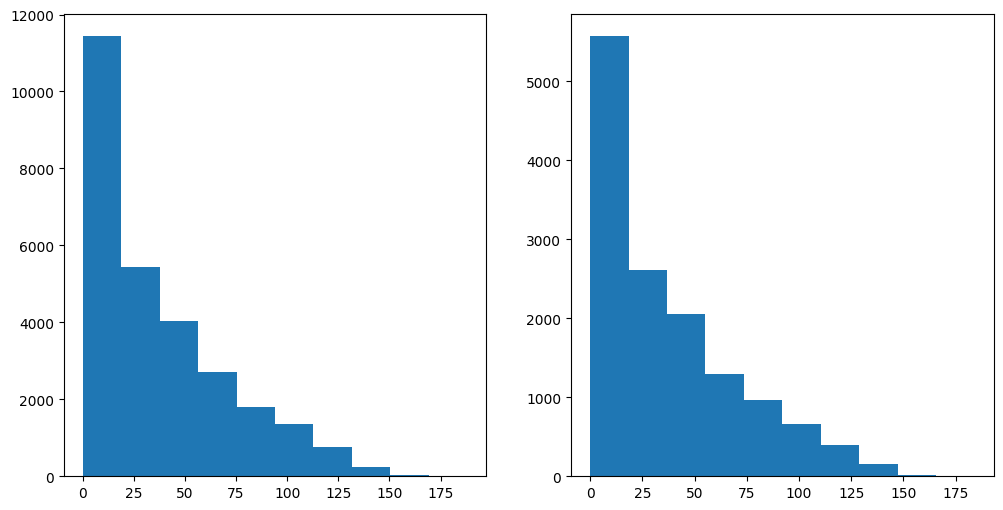

In [77]:
train_lens = [len(s) for s in x_train]
test_lens = [len(s) for s in x_test]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [78]:
max_len = 100

In [79]:
x_train = pad_sequences(x_train, maxlen=max_len, padding="post")
x_test = pad_sequences(x_test, maxlen=max_len, padding="post")

In [80]:
x_train.shape, x_test.shape

((27855, 100), (13721, 100))

In [54]:
from keras.layers import Dropout
from keras.layers import GlobalMaxPool1D
from keras.callbacks import ModelCheckpoint

In [55]:
filepath="weights-improvement.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= "val_accuracy" , verbose=1, save_best_only=True,
    mode= "max")
callbacks_list = [checkpoint]

In [56]:
from keras import backend as K 

In [95]:
K.clear_session()

In [96]:
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, max_len, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=6, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.7))
    model.add(Flatten())
    model.add(Dense(7, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
model = define_model(vocab_size=vocab_size, max_length=max_len)
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=5,
                    verbose=2,
                    shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3579900   
                                                                 
 conv1d (Conv1D)             (None, 95, 32)            19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 47, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 32)            0         
                                                                 
 flatten (Flatten)           (None, 1504)              0         
                                                                 
 dense (Dense)               (None, 7)                 10535     
                                                        

In [97]:
_, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluate model on test dataset
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 94.880635
Test Accuracy: 76.051307


drop 0.7
test accuracy 76
train accuracy 97.5

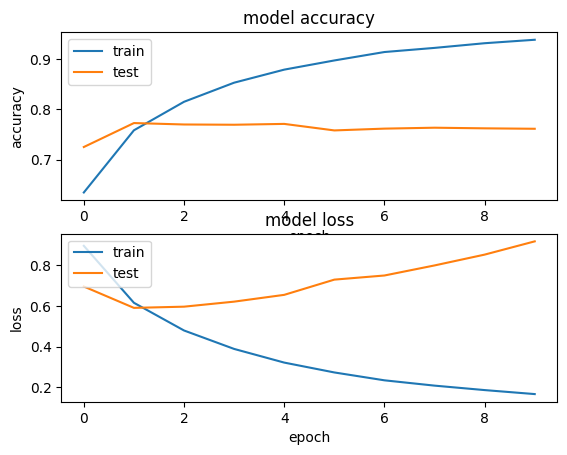

In [61]:
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
from keras.layers import Input
from keras.layers import concatenate
from keras.models import Model

In [90]:
K.clear_session()

In [91]:
def multi_layer_model(vocab_size, max_length):
    # 1st channel
    inputs1 = Input(shape = (max_length))
    embedding1 = Embedding(vocab_size, 100)(inputs1)
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.7)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    
    # 2nd channel
    inputs2 = Input(shape = (max_length))
    embedding2 = Embedding(vocab_size, 100)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.7)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)

    # 3rd channel
    inputs3 = Input(shape = (max_length))
    embedding3 = Embedding(vocab_size, 100)(inputs3)
    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.7)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)


    merged = concatenate([flat1, flat2, flat3])
    #dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(7, activation='softmax')(merged)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [92]:
model_multi = multi_layer_model(vocab_size=vocab_size, max_length=max_len)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     3579900     ['input_1[0][0]']                
                                                                                              

In [93]:
history_multi = model_multi.fit([x_train, x_train, x_train], y_train,
                    validation_data=([x_test, x_test, x_test], y_test),
                    epochs=5,
                    verbose=2,
                    shuffle=True)

Epoch 1/5
871/871 - 104s - loss: 0.7880 - accuracy: 0.6863 - val_loss: 0.6288 - val_accuracy: 0.7642 - 104s/epoch - 120ms/step
Epoch 2/5
871/871 - 104s - loss: 0.4400 - accuracy: 0.8338 - val_loss: 0.5850 - val_accuracy: 0.7784 - 104s/epoch - 120ms/step
Epoch 3/5
871/871 - 105s - loss: 0.2550 - accuracy: 0.9075 - val_loss: 0.6308 - val_accuracy: 0.7645 - 105s/epoch - 120ms/step
Epoch 4/5
871/871 - 106s - loss: 0.1489 - accuracy: 0.9484 - val_loss: 0.6698 - val_accuracy: 0.7631 - 106s/epoch - 121ms/step
Epoch 5/5
871/871 - 105s - loss: 0.0988 - accuracy: 0.9663 - val_loss: 0.7638 - val_accuracy: 0.7580 - 105s/epoch - 121ms/step


In [94]:
_, acc = model_multi.evaluate([x_train, x_train, x_train], y_train, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluate model on test dataset
_, acc = model_multi.evaluate([x_test, x_test, x_test], y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 99.199426
Test Accuracy: 75.803512


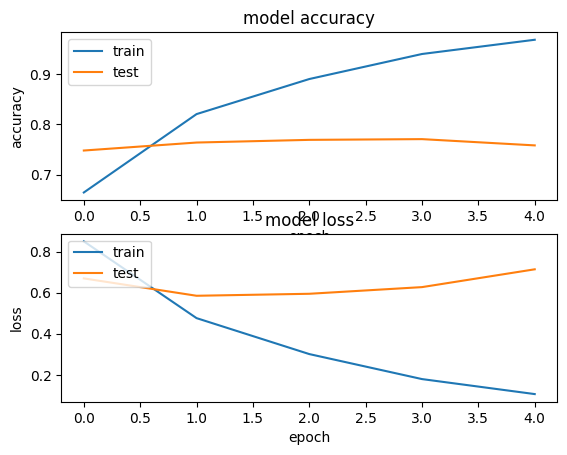

In [68]:
plt.subplot(211)
plt.plot(history_multi.history['accuracy'])
plt.plot(history_multi.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(212)
plt.plot(history_multi.history['loss'])
plt.plot(history_multi.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()